In [2]:
# https://www.kaggle.com/c/plant-seedlings-classification/data
from fastai import *
from fastai.vision import *
%matplotlib inline

In [3]:
path = Path('data')

In [28]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=64, size=128, ds_tfms=get_transforms(flip_vert=True))

In [29]:
learn = create_cnn(data, models.resnet101, metrics=[error_rate, accuracy])

In [5]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


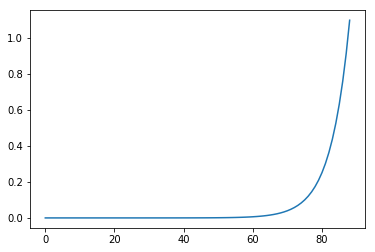

In [6]:
learn.recorder.plot_lr()

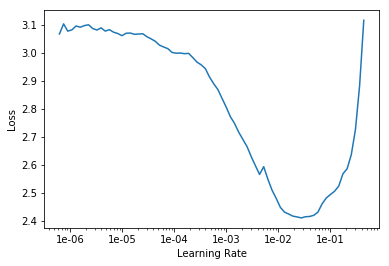

In [7]:
learn.recorder.plot()

In [8]:
learn.fit(4, lr=1e-2)

Total time: 02:52
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.991746    0.941134    0.281893    0.718107  (00:46)
2      0.800445    0.619156    0.205761    0.794239  (00:42)
3      0.808221    0.644798    0.208848    0.791152  (00:41)
4      0.634630    0.710940    0.213992    0.786008  (00:41)



In [9]:
learn.save('4epochs-resnet101')

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


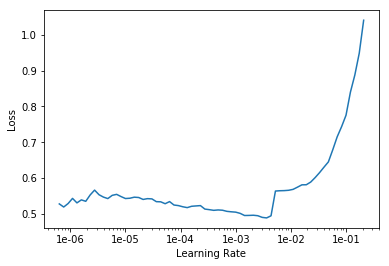

In [10]:
learn.lr_find()
learn.recorder.plot()

In [11]:
learn.fit(4, lr=1e-4)

Total time: 02:47
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.469398    0.331056    0.103909    0.896091  (00:42)
2      0.398973    0.317728    0.108025    0.891975  (00:42)
3      0.410176    0.319727    0.105967    0.894033  (00:41)
4      0.361930    0.304470    0.096708    0.903292  (00:41)



In [12]:
learn.save('8epochs-resnet101')

In [14]:
learn.fit_one_cycle(4, max_lr=1e-4 / 10)

Total time: 02:46
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.369967    0.312629    0.094650    0.905350  (00:40)
2      0.368761    0.316822    0.099794    0.900206  (00:41)
3      0.401591    0.296458    0.092593    0.907407  (00:42)
4      0.362708    0.302210    0.098765    0.901235  (00:41)



In [15]:
learn.fit_one_cycle(4, max_lr=1e-6)

Total time: 02:47
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.364482    0.297342    0.093621    0.906379  (00:41)
2      0.452718    0.315184    0.099794    0.900206  (00:41)
3      0.379820    0.313192    0.098765    0.901235  (00:43)
4      0.399971    0.302006    0.093621    0.906379  (00:41)



In [16]:
learn.save('16epochs-resnet101')

In [17]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


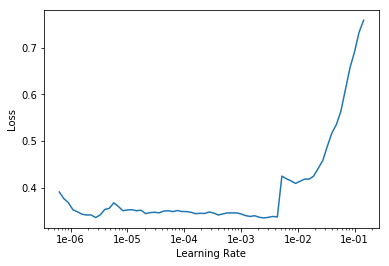

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(4, max_lr=1e-6)

Total time: 02:46
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.354361    0.310109    0.096708    0.903292  (00:41)
2      0.375831    0.305236    0.096708    0.903292  (00:41)
3      0.382720    0.302503    0.100823    0.899177  (00:41)
4      0.396402    0.305821    0.102881    0.897119  (00:41)



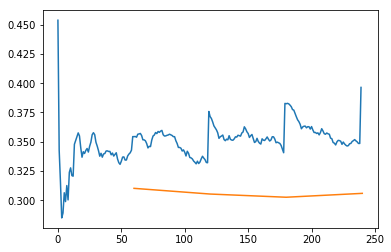

In [20]:
learn.recorder.plot_losses()

In [21]:
learn.save('stage-1-resnet101')

In [22]:
learn.unfreeze()
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


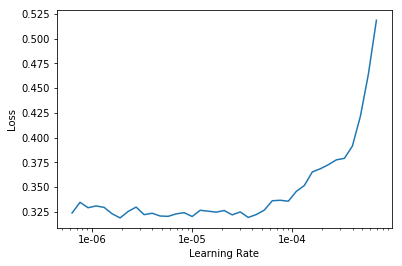

In [23]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(4, max_lr=slice(1e-7, 1e-6))

Total time: 03:39
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.353035    0.293572    0.090535    0.909465  (00:55)
2      0.418699    0.299551    0.096708    0.903292  (00:54)
3      0.389731    0.300062    0.092593    0.907407  (00:55)
4      0.343151    0.301676    0.098765    0.901235  (00:54)



In [27]:
learn.save('stage-2-resnet101')

In [28]:
data2 = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=32, size=224, ds_tfms=get_transforms(flip_vert=True))

In [29]:
learn.data = data2

In [30]:
learn.freeze()

In [31]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


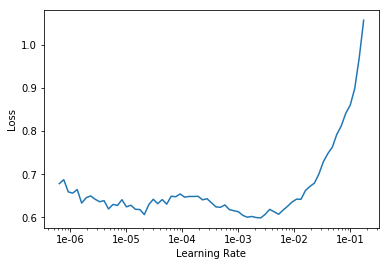

In [32]:
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(10, max_lr=1e-3/5)

Total time: 18:28
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.637256    0.313151    0.118534    0.881465  (01:55)
2      0.500851    0.257259    0.090517    0.909483  (01:49)
3      0.439708    0.218993    0.076509    0.923491  (01:50)
4      0.381286    0.197674    0.077586    0.922414  (01:50)
5      0.376910    0.194093    0.070043    0.929957  (01:50)
6      0.364438    0.177801    0.067888    0.932112  (01:50)
7      0.339583    0.172102    0.061422    0.938578  (01:49)
8      0.327563    0.172579    0.066810    0.933190  (01:50)
9      0.349490    0.168286    0.067888    0.932112  (01:50)
10     0.333976    0.164122    0.063578    0.936422  (01:50)



In [34]:
learn.save('10_224-resnet101')

In [35]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


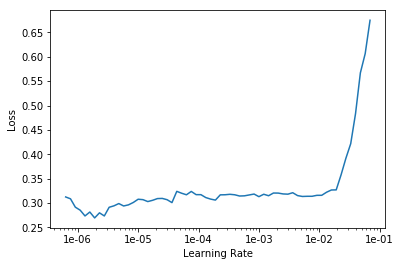

In [36]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy


In [39]:
learn.fit_one_cycle(5, max_lr=slice(1e-8, 1e-6))

Total time: 05:37
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.087650    0.081752    0.027689    0.972311  (01:07)
2      0.096201    0.080926    0.025559    0.974441  (01:07)
3      0.092436    0.083917    0.028754    0.971246  (01:07)
4      0.095888    0.080334    0.026624    0.973376  (01:07)
5      0.087287    0.086270    0.026624    0.973376  (01:07)



In [40]:
learn.fit_one_cycle(5, max_lr=slice(1e-10, 1e-8))

Total time: 05:37
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.082986    0.080664    0.024494    0.975506  (01:07)
2      0.085163    0.081085    0.025559    0.974441  (01:07)
3      0.086029    0.081423    0.026624    0.973376  (01:07)
4      0.083338    0.082550    0.027689    0.972311  (01:07)
5      0.090084    0.081177    0.024494    0.975506  (01:07)



In [41]:
learn.save('25_225-resnet101')

In [46]:
learn.unfreeze()

In [47]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


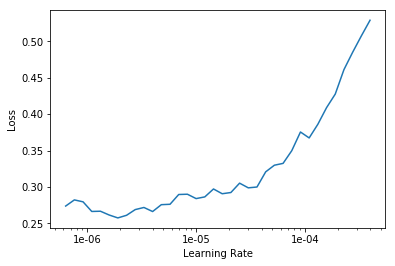

In [48]:
learn.recorder.plot()

In [49]:
learn.lr_find(1e-11, 1e-4)

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


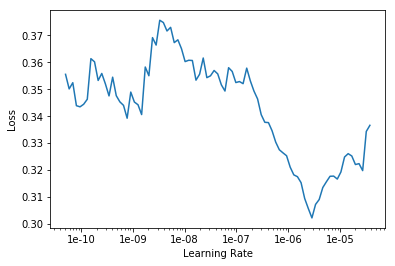

In [50]:
learn.recorder.plot()

In [51]:
learn.fit_one_cycle(5, max_lr=slice(1e-7, 1e-7/5))

Total time: 12:14
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.315943    0.165194    0.062500    0.937500  (02:28)
2      0.310546    0.164873    0.070043    0.929957  (02:27)
3      0.309440    0.166029    0.068966    0.931035  (02:27)
4      0.321186    0.170832    0.067888    0.932112  (02:26)
5      0.303326    0.165817    0.065733    0.934267  (02:26)



In [52]:
learn.fit_one_cycle(5, max_lr=slice(1e-8, 1e-6*3))

Total time: 12:17
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.322692    0.165209    0.064655    0.935345  (02:27)
2      0.315878    0.166421    0.066810    0.933190  (02:27)
3      0.312676    0.163506    0.066810    0.933190  (02:27)
4      0.323163    0.165075    0.061422    0.938578  (02:27)
5      0.332396    0.162470    0.067888    0.932112  (02:27)



In [53]:
learn.save('224_stage-2-resnet101')

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


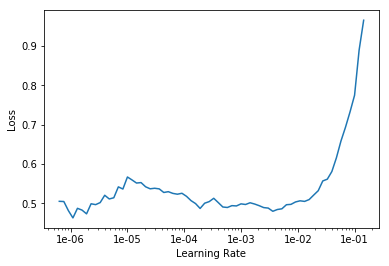

In [54]:
data3 = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=24, size=299, ds_tfms=get_transforms(flip_vert=True))
learn.data = data3
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [55]:
learn.fit_one_cycle(5, max_lr=1e-3)

Total time: 17:35
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.411849    0.254003    0.082661    0.917339  (03:47)
2      0.394194    0.256706    0.094758    0.905242  (03:26)
3      0.302639    0.185231    0.061492    0.938508  (03:27)
4      0.249559    0.136912    0.055444    0.944556  (03:27)
5      0.243314    0.131279    0.051411    0.948589  (03:26)



In [56]:
learn.fit_one_cycle(5, max_lr=1e-3/100)

Total time: 17:14
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.245581    0.133817    0.047379    0.952621  (03:27)
2      0.254622    0.133582    0.051411    0.948589  (03:26)
3      0.227718    0.128496    0.044355    0.955645  (03:27)
4      0.219362    0.132266    0.049395    0.950605  (03:26)
5      0.233463    0.134352    0.048387    0.951613  (03:26)



LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


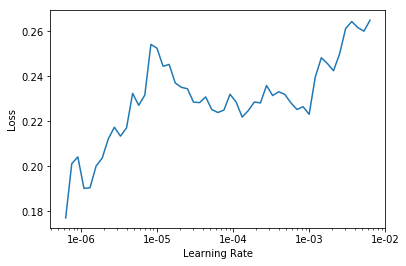

In [57]:
learn.lr_find()
learn.recorder.plot()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


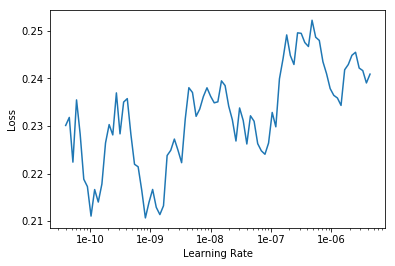

In [58]:
learn.lr_find(1e-11, 1e-5)
learn.recorder.plot()

In [59]:
learn.fit_one_cycle(5, max_lr=1e-6)

Total time: 17:05
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.228110    0.136485    0.049395    0.950605  (03:26)
2      0.250317    0.128471    0.047379    0.952621  (03:26)
3      0.226645    0.129792    0.048387    0.951613  (03:24)
4      0.218238    0.128909    0.041331    0.958669  (03:24)
5      0.241867    0.132264    0.052419    0.947581  (03:23)



In [60]:
learn.unfreeze()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


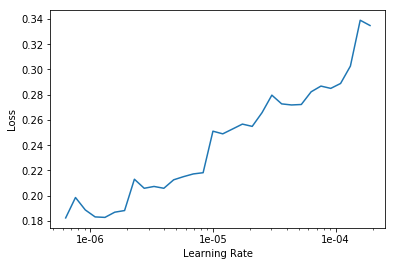

In [61]:
learn.lr_find()
learn.recorder.plot()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


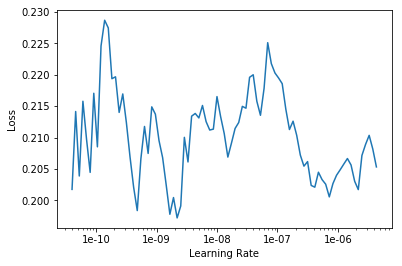

In [63]:
learn.lr_find(1e-11, 1e-5)
learn.recorder.plot()

In [64]:
learn.fit_one_cycle(6, max_lr=slice(1e-7, 1e-6 * 5))

Total time: 26:44
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.227938    0.132381    0.040323    0.959677  (04:31)
2      0.217654    0.128007    0.043347    0.956653  (04:26)
3      0.232794    0.125426    0.043347    0.956653  (04:26)
4      0.213031    0.127413    0.044355    0.955645  (04:26)
5      0.209718    0.126542    0.040323    0.959677  (04:26)
6      0.225110    0.125943    0.045363    0.954637  (04:26)



In [65]:
learn.save('299-unfreeze-resnet101')

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


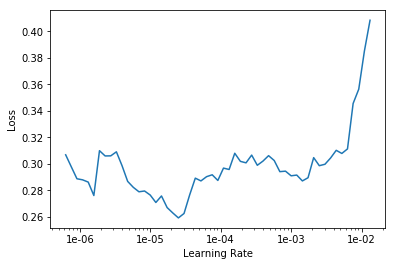

In [66]:
data4 = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=16, size=384, 
                                   ds_tfms=get_transforms(flip_vert=True)).normalize(imagenet_stats)
learn.data = data4
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [67]:
learn.fit_one_cycle(4, 1e-5)

Total time: 19:07
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.324763    0.109703    0.035380    0.964620  (05:00)
2      0.331499    0.106330    0.032258    0.967742  (04:41)
3      0.310883    0.107671    0.032258    0.967742  (04:41)
4      0.334279    0.102142    0.028096    0.971904  (04:42)



LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


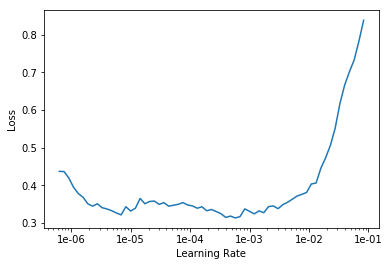

In [68]:
learn.lr_find()
learn.recorder.plot()

In [69]:
learn.fit_one_cycle(10, 1e-4)

Total time: 47:02
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.286636    0.101177    0.034339    0.965661  (04:42)
2      0.351552    0.102107    0.033299    0.966701  (04:42)
3      0.314691    0.102499    0.033299    0.966701  (04:41)
4      0.312385    0.094493    0.031217    0.968783  (04:43)
5      0.299902    0.095854    0.032258    0.967742  (04:42)
6      0.254840    0.094750    0.031217    0.968783  (04:41)
7      0.257792    0.089549    0.027055    0.972945  (04:42)
8      0.247955    0.084526    0.027055    0.972945  (04:42)
9      0.258606    0.089931    0.030177    0.969823  (04:42)
10     0.247815    0.088938    0.028096    0.971904  (04:42)



In [70]:
learn.save('384-freeze-resnet101')

In [30]:
data5 = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=12, size=512, 
                                   ds_tfms=get_transforms(flip_vert=True)).normalize(imagenet_stats)
learn.data = data5
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [72]:
learn.fit_one_cycle(4, 1e-3*5)

Total time: 32:37
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.664807    0.406844    0.152311    0.847689  (08:26)
2      0.641664    0.254493    0.078782    0.921219  (08:03)
3      0.384523    0.122714    0.038866    0.961134  (08:03)
4      0.264151    0.093998    0.031513    0.968487  (08:03)



In [73]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


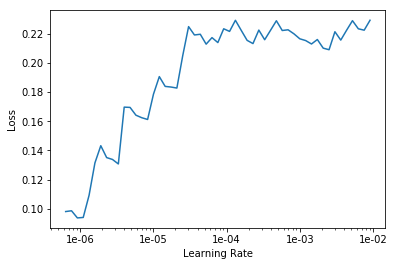

In [74]:
learn.recorder.plot()

In [75]:
learn.fit_one_cycle(4, 1e-6/5)

Total time: 32:13
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.275116    0.094337    0.031513    0.968487  (08:03)
2      0.225333    0.098891    0.033613    0.966387  (08:03)
3      0.251584    0.092050    0.029412    0.970588  (08:03)
4      0.257878    0.096354    0.032563    0.967437  (08:03)



In [76]:
learn.save("freeze-512-resnet101")

In [31]:
learn.unfreeze()
learn.lr_find()

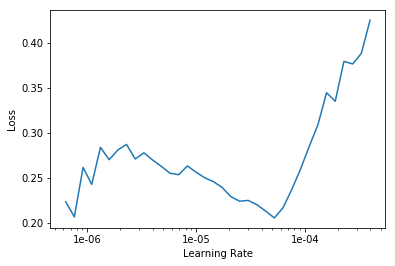

In [78]:
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(6, max_lr=slice(1e-6, 1e-4))

Total time: 1:05:03
epoch  train_loss  valid_loss  error_rate  accuracy
1      2.158851    1.644747    0.501505    0.498495  (11:22)
2      0.908020    0.447435    0.134403    0.865597  (10:43)
3      0.450247    0.243672    0.087262    0.912738  (10:44)
4      0.336976    0.189878    0.067202    0.932798  (10:44)
5      0.292864    0.171771    0.058175    0.941825  (10:44)
6      0.270433    0.162502    0.059178    0.940822  (10:43)



In [33]:
learn.save('unfreeze-512-resnet101')

### Kaggle submission

In [34]:
tmp_data = ImageDataBunch.from_folder(path, train='train', valid_pct=0.1, test='test', bs=12, size=512, 
                                      ds_tfms=get_transforms(flip_vert=True)).normalize(imagenet_stats)
tmp_learn = create_cnn(tmp_data, models.resnet101, metrics=error_rate)
tmp_learn.load('unfreeze-512-resnet101')
preds = tmp_learn.get_preds(DatasetType.Test)
class_guess = preds[0].argmax(dim=1)
len(class_guess)

794

In [35]:
d = dict()
for f, g in zip((path / 'test').ls(), class_guess):
    d[f.name] = tmp_data.classes[g]
len(d)

794

In [36]:
df = pd.DataFrame(list(d.items()), columns=['file', 'species'])
df.to_csv('unfreeze-512-resnet101.csv', index=False)